# Data Analysis with Pandas - Lab

## Introduction

In this lab, you will make use of everything we have learned about pandas: data cleaning, reshaping, and joining. 

In order to complete this lab, you’ll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives

You will be able to:
- Open and inspect the contents of CSVs using pandas DataFrames
- Identify and handle missing values
- Identify and handle invalid values
- Clean text data by removing whitespace and fix typos
- Join multiple pandas DataFrames
- Aggregate data by groups
- Create visualizations
- Use visualizations and summary statistics to answer business questions.

### Data Understanding

You will be working with a version of the comprehensive Superheroes Dataset, which can be found on Kaggle and was originally scrapped from SuperHeroDb. We have modified the structure and contents of the dataset somewhat for the purposes of this lab. 

The data is contained in two separate CSV files:
1. `heroes_information.csv`: each record represents a superhero, with attributes of that superhero (e.g. eye
color). Height is measured in centimeters, and weight is measured in pounds.
2. `super_hero_powers.csv`: each record represents a superpower, then has True/False values representing
whether each superhero has that power

### Business Understanding

The business questions you have been provided are:
1. What is the distribution of superheroes by publisher?
2. What is the relationship between height and number of superpowers? And does this differ based on gender?
3. What are the 5 most common superpowers in Marvel Comics vs. DC Comics?

*This lab also simulates something you are likely to encounter at some point or another in your career in data science: someone has given you access to a dataset, as well as a few questions, and has told you to find something interesting.*

## Section 1

### Load the Data with Pandas

Create DataFrames `heroes_df` and `powers_df` that represent the two CSV files. Use pandas methods to inspect the shape and other attributes of these DataFrames.

### Superheroes

In [1]:
# CodeGrade step0
# Run this cell without any changes

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

### Step 1

Now you want to get familiar with the data. This step includes:
- Import your dataset
- Understanding the dimensionality of your dataset
- Investigating what type of data it contains, and the data types used to store it
- Discovering how missing values are encoded, and how many there are

In the cell below, inspect the overall shape of the dataframe:
- Set the `index_col=0` argument to use the first column as the index

In [2]:
# CodeGrade step1
# Replace None with your code

# Load the data as heroes_df
with open('heroes_information.csv', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    data = list(reader)

heroes_df = pd.DataFrame(data)

# Check the shape
heroes_shape = heroes_df.shape
heroes_shape

(734, 11)

Now let's look at the info printout:

In [3]:
# Run this cell without any changes

heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0               734 non-null    object
 1   name        734 non-null    object
 2   Gender      734 non-null    object
 3   Eye color   734 non-null    object
 4   Race        734 non-null    object
 5   Hair color  734 non-null    object
 6   Height      734 non-null    object
 7   Publisher   734 non-null    object
 8   Skin color  734 non-null    object
 9   Alignment   734 non-null    object
 10  Weight      734 non-null    object
dtypes: object(11)
memory usage: 63.2+ KB


In [4]:
heroes_df.head(5)

,,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203,Marvel Comics,-,good,441
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191,Dark Horse Comics,blue,good,65
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185,DC Comics,red,good,90
3,3,Abomination,Male,green,Human / Radiation,No Hair,203,Marvel Comics,-,bad,441
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99,Marvel Comics,-,bad,-99


Do the data types line up with what we expect? Are there any missing values? All good things to think about which we might need to handle in Section 2.

## Superpowers

### Step 2
Now, repeat the same process with `super_hero_powers.csv`. Name the DataFrame `powers_df`. This time, make sure you use `index_col=0` when opening the CSV because the index contains important information.

In [5]:
# CodeGrade step2
# Replace None with appropriate code

# load super_hero_powers.csv as powers_df
#with open('super_hero_powers.csv', encoding='utf-8', index_col=0) as f:
#    reader = csv.DictReader(f)
#    data2 = list(reader)
powers_df = pd.read_csv('super_hero_powers.csv', encoding='utf-8', index_col=0)
#powers_df = pd.DataFrame(data2)

# check the shape
powers_shape = powers_df.shape
powers_shape

(167, 667)

In [6]:
# Run this cell without changes
# Check the info printout
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Agility to Omniscient
Columns: 667 entries, 3-D Man to Zoom
dtypes: bool(667)
memory usage: 110.1+ KB


## Section 2

### Perform Data Cleaning Required to Answer First Question

Recall that the first question is: *What is the distribution of superheroes by publisher?*

To answer this question, we will only need to use `heroes_df`, which contains the Publisher column.

### Identifying and Handling Missing Values

As you likely noted above, the Publisher column is missing some values.

Recall that there are two general strategies for dealing with missing values:
1. Fill in missing values (either using another value from the column, e.g. the mean or mode, or using some other value like "Unknown")
2. Drop rows with missing values

### Step 3
Here, implement the strategy to drop rows with missing values using code. Only drop rows that are missing information from the `Publisher` column. Save over `heroes_df` with the new dataframe that has less rows.

In [7]:
# CodeGrade step3
# Replace None with appropriate code
heroes_df['Publisher'] = heroes_df['Publisher'].replace(r'^\s*$', np.nan, regex=True)
heroes_df['Publisher'].isna().sum()
# Drop rows with missing values

15

In [8]:
heroes_df = heroes_df.dropna(subset=['Publisher'])
heroes_df['Publisher'].isna().sum()

0

Now there should be no missing values in the publisher column. Let's confirm by checking the info printout:

In [9]:
# Run this cell without changes
# Check the info printout
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0               719 non-null    object
 1   name        719 non-null    object
 2   Gender      719 non-null    object
 3   Eye color   719 non-null    object
 4   Race        719 non-null    object
 5   Hair color  719 non-null    object
 6   Height      719 non-null    object
 7   Publisher   719 non-null    object
 8   Skin color  719 non-null    object
 9   Alignment   719 non-null    object
 10  Weight      719 non-null    object
dtypes: object(11)
memory usage: 67.4+ KB


### Identifying and Handling Text Data Requiring Cleaning

The overall field of natural language processing (NLP) is quite broad, and we're not going to get into any advanced text processing, but it's useful to be able to clean up minor issues in text data.

### Step 4

Let's take a look at the counts of heroes grouped by publisher by calling the value counts of the column:

In [10]:
# CodeGrade step4
# Replace None with appropriate code
# Call the value counts of the Publisher column

pub_counts = heroes_df['Publisher'].value_counts()
pub_counts

Publisher
Marvel Comics        379
DC Comics            212
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Marvel                 9
Star Trek              6
HarperCollins          6
Team Epic TV           5
SyFy                   5
IDW Publishing         4
Icon Comics            4
ABC Studios            4
Shueisha               4
Wildstorm              3
 DC Comics             3
Sony Pictures          2
Titan Books            1
Microsoft              1
Rebellion              1
Hanna-Barbera          1
J. K. Rowling          1
Universal Studios      1
South Park             1
J. R. R. Tolkien       1
Name: count, dtype: int64

There are two cases where we appear to have data entry issues, and publishers that should be encoded the same have not been. In other words, there are four categories present that really should be counted as two categories and you do not need specific comic book knowledge to be able to identify them.

HINT: It involves the two biggest Publishers

### Step 5
Identify those two cases and write some code to handle them. If you're not sure where to start, look at the pandas documentation for [replacing values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html) and [stripping off whitespace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html). You can accomplish this in either one or two lines of code, two have been provided, delete the second if you do it in one line.

- Please make sure to keep "Comics" as a part of both names

In [11]:
# Thanks to the hint, I see DC Comics and Marvel has typo issues
sorted(heroes_df['Publisher'].dropna().unique())

[' DC Comics',
 'ABC Studios',
 'DC Comics',
 'Dark Horse Comics',
 'George Lucas',
 'Hanna-Barbera',
 'HarperCollins',
 'IDW Publishing',
 'Icon Comics',
 'Image Comics',
 'J. K. Rowling',
 'J. R. R. Tolkien',
 'Marvel',
 'Marvel Comics',
 'Microsoft',
 'NBC - Heroes',
 'Rebellion',
 'Shueisha',
 'Sony Pictures',
 'South Park',
 'Star Trek',
 'SyFy',
 'Team Epic TV',
 'Titan Books',
 'Universal Studios',
 'Wildstorm']

In [12]:
# DC Comics
heroes_df['Publisher'] = heroes_df['Publisher'].str.strip()
sorted(heroes_df['Publisher'].dropna().unique())

['ABC Studios',
 'DC Comics',
 'Dark Horse Comics',
 'George Lucas',
 'Hanna-Barbera',
 'HarperCollins',
 'IDW Publishing',
 'Icon Comics',
 'Image Comics',
 'J. K. Rowling',
 'J. R. R. Tolkien',
 'Marvel',
 'Marvel Comics',
 'Microsoft',
 'NBC - Heroes',
 'Rebellion',
 'Shueisha',
 'Sony Pictures',
 'South Park',
 'Star Trek',
 'SyFy',
 'Team Epic TV',
 'Titan Books',
 'Universal Studios',
 'Wildstorm']

In [13]:
# Marvel
publi_map = {'Marvel' : 'Marvel Comics'}
heroes_df['Publisher'] = heroes_df['Publisher'].replace(publi_map)
sorted(heroes_df['Publisher'].dropna().unique())

['ABC Studios',
 'DC Comics',
 'Dark Horse Comics',
 'George Lucas',
 'Hanna-Barbera',
 'HarperCollins',
 'IDW Publishing',
 'Icon Comics',
 'Image Comics',
 'J. K. Rowling',
 'J. R. R. Tolkien',
 'Marvel Comics',
 'Microsoft',
 'NBC - Heroes',
 'Rebellion',
 'Shueisha',
 'Sony Pictures',
 'South Park',
 'Star Trek',
 'SyFy',
 'Team Epic TV',
 'Titan Books',
 'Universal Studios',
 'Wildstorm']

In [14]:
# CodeGrade step5
# Replace None with appropriate code

# Handle data entry issues
#heroes_df['Publisher'] = None
#heroes_df['Publisher'] = None

correct_counts = heroes_df['Publisher'].value_counts()
correct_counts

Publisher
Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Star Trek              6
HarperCollins          6
SyFy                   5
Team Epic TV           5
Icon Comics            4
ABC Studios            4
IDW Publishing         4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
South Park             1
Universal Studios      1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Microsoft              1
J. R. R. Tolkien       1
Name: count, dtype: int64

### Answering the Question

Now we should be able to answer "*What is the distribution of superheroes by publisher?*"
If your data cleaning was done correctly, this code should work without any further changes:


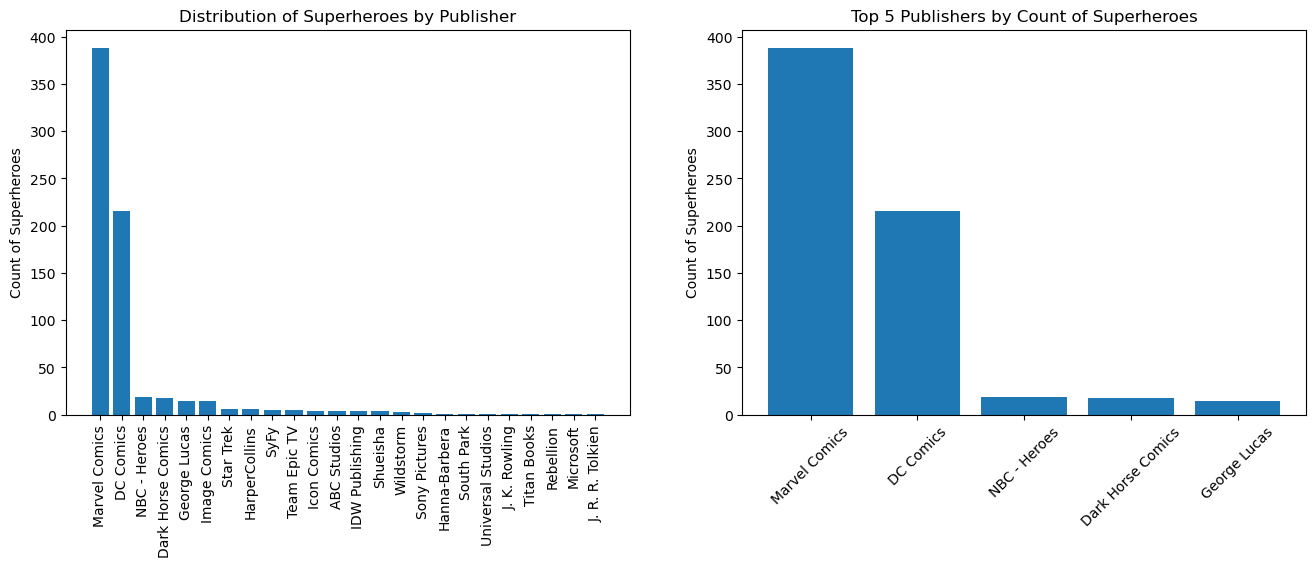

In [15]:
# Run this cell with no changes
# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = heroes_df["Publisher"].value_counts()
top_5_counts = value_counts.iloc[:5]

# Plot data
ax1.bar(value_counts.index, value_counts.values)
ax2.bar(top_5_counts.index, top_5_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_ylabel("Count of Superheroes")
ax2.set_ylabel("Count of Superheroes")
ax1.set_title("Distribution of Superheroes by Publisher")
ax2.set_title("Top 5 Publishers by Count of Superheroes");

## Section 3

### Perform Data Aggregation and Cleaning Required to Answer Second Question

Recall that the second question is: *What is the relationship between height and number of superpowers? And does this differ based on gender?*

Unlike the previous question, we won't be able to answer this with just `heroes_df`, since information about height is contained in `heroes_df`, while information about superpowers is contained in `powers_df`.

We will need to join these DataFrames to address these questions.

### Joining the DataFrames Together

We need to reshape the `powers_df` DataFrame in order for it to be merged with the `heroes_df` DataFrame using a shared key. (Shared key meaning, the values you want to join on.) Let's look at them again.

### Step 6

First, get a transposed version of the powers DataFrame. This means
that what used to be the row index is now the column name, and vice versa:

In [16]:
heroes_df.head()

,,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203,Marvel Comics,-,good,441
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191,Dark Horse Comics,blue,good,65
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185,DC Comics,red,good,90
3,3,Abomination,Male,green,Human / Radiation,No Hair,203,Marvel Comics,-,bad,441
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99,Marvel Comics,-,bad,-99


In [17]:
# Transform to numeric
heroes_df['Height'] = pd.to_numeric(heroes_df['Height'], errors='coerce')

In [18]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0               719 non-null    object 
 1   name        719 non-null    object 
 2   Gender      719 non-null    object 
 3   Eye color   719 non-null    object 
 4   Race        719 non-null    object 
 5   Hair color  719 non-null    object 
 6   Height      719 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  719 non-null    object 
 9   Alignment   719 non-null    object 
 10  Weight      719 non-null    object 
dtypes: float64(1), object(10)
memory usage: 67.4+ KB


In [19]:
# How many are < 0
heroes_df.loc[heroes_df['Height'] <= 0].sort_values(by='Height')

,,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99
453,453,Minna Murray,Female,-,-,-,-99.0,Wildstorm,-,good,-99
454,454,Misfit,Female,blue,-,Red,-99.0,DC Comics,-,good,-99
458,458,Mister Knife,Male,blue,Spartoi,Brown,-99.0,Marvel Comics,-,bad,-99
459,459,Mister Mxyzptlk,Male,-,God / Eternal,-,-99.0,DC Comics,-,bad,-99
...,...,...,...,...,...,...,...,...,...,...,...
242,242,Energy,Female,-,-,-,-99.0,HarperCollins,-,good,-99
243,243,ERG-1,Male,-,-,-,-99.0,DC Comics,-,good,-99
251,251,Fallen One II,Male,black,-,Blue,-99.0,Marvel Comics,-,bad,-99
715,715,Wildfire,Male,-,-,-,-99.0,DC Comics,-,good,-99


In [20]:
heroes_df.loc[heroes_df['Height'] <= 0].shape[0]

208

In [21]:
208 / 719 

# 30% of the data does not have height !!!
# Two options , eliminate 30% of the data or replace with the mean by gender
# I choose 2nd option

0.28929068150208626

In [22]:
from scipy.stats import skew

# Skewness of positive heights
height_skew = skew(heroes_df[heroes_df['Height'] > 0]['Height'])
print(f"Skewness: {height_skew:.2f}")

# Outliers are a mess
# Skew ≈ 0 → symmetric (normal)
# Skew > 0 → right-skewed (tail on the right)
# Skew < 0 → left-skewed (tail on the left)

Skewness: 9.07


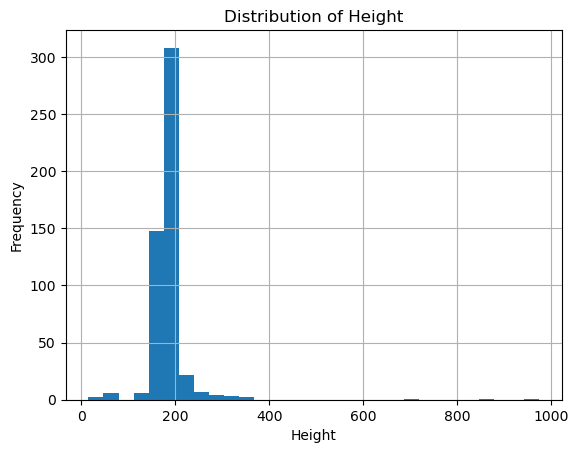

In [23]:
# According to the histogram, I will use the mean WITHOUT negative values

heroes_df[heroes_df['Height'] > 0]['Height'].hist(bins=30)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [24]:
heroes_df['Gender'] = heroes_df['Gender'].str.strip()

In [25]:
heroes_df['Gender'] = heroes_df['Gender'].replace(r'^\s*$',np.nan, regex=True)
heroes_df['Gender'] = heroes_df['Gender'].replace('-', np.nan)
heroes_df['Gender'].isna().sum()

27

In [26]:
mean_heights = heroes_df[heroes_df['Height'] > 0].groupby('Gender')['Height'].mean().to_dict()
mean_heights

{'Female': 174.68402777777777, 'Male': 192.57648725212465}

In [27]:
# Verify
# I will drop gender = NaN
heroes_df.loc[heroes_df['Height'] <= 0].sort_values(by='Height')

,,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99
453,453,Minna Murray,Female,-,-,-,-99.0,Wildstorm,-,good,-99
454,454,Misfit,Female,blue,-,Red,-99.0,DC Comics,-,good,-99
458,458,Mister Knife,Male,blue,Spartoi,Brown,-99.0,Marvel Comics,-,bad,-99
459,459,Mister Mxyzptlk,Male,-,God / Eternal,-,-99.0,DC Comics,-,bad,-99
...,...,...,...,...,...,...,...,...,...,...,...
242,242,Energy,Female,-,-,-,-99.0,HarperCollins,-,good,-99
243,243,ERG-1,Male,-,-,-,-99.0,DC Comics,-,good,-99
251,251,Fallen One II,Male,black,-,Blue,-99.0,Marvel Comics,-,bad,-99
715,715,Wildfire,Male,-,-,-,-99.0,DC Comics,-,good,-99


In [28]:
heroes_df = heroes_df.dropna(subset=['Gender'])
heroes_df['Gender'].isna().sum()

0

In [29]:
# Nothing !
heroes_df.loc[heroes_df['Height'] <= 0].sort_values(by='Height')

,,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99
458,458,Mister Knife,Male,blue,Spartoi,Brown,-99.0,Marvel Comics,-,bad,-99
459,459,Mister Mxyzptlk,Male,-,God / Eternal,-,-99.0,DC Comics,-,bad,-99
461,461,Mister Zsasz,Male,blue,Human,Blond,-99.0,DC Comics,-,bad,-99
464,464,Mogo,Male,-,Planet,-,-99.0,DC Comics,-,good,-99
...,...,...,...,...,...,...,...,...,...,...,...
243,243,ERG-1,Male,-,-,-,-99.0,DC Comics,-,good,-99
251,251,Fallen One II,Male,black,-,Blue,-99.0,Marvel Comics,-,bad,-99
252,252,Faora,Female,-,Kryptonian,-,-99.0,DC Comics,-,bad,-99
163,163,Cat II,Female,-,-,-,-99.0,Marvel Comics,-,good,-99


In [30]:
mean_heights

{'Female': 174.68402777777777, 'Male': 192.57648725212465}

We need to reshape the `powers_df` DataFrame in order for it to be merged with the `heroes_df` DataFrame using a shared key. (Shared key meaning, the values you want to join on.) Let's look at them again.

### Step 6

First, get a transposed version of the powers DataFrame. This means
that what used to be the row index is now the column name, and vice versa:

In [45]:
# CodeGrade step6
# Replace None with appropriate code

# Transpose the powers_df DataFrame
powers_df_transposed = powers_df.T
powers_df_transposed.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Step 7

Next name the index of `powers_df_transposed` "name" and then reset the index so that the DataFrame can be combined with `heroes_df`. This will make the "name" column (old index) appear as the first column in the dataframe.

# CodeGrade step7
# Replace None with appropriate code

# Change the name of the index to name
powers_df_transposed.columns = powers_df_transposed.iloc[0]

# Reset the powers_df_transposed index
#powers_df_transposed = powers_df_transposed.drop(powers_df_transposed.index[0])

# Call the new DataFrame to check work
powers_df_transposed.head()

### Step 8
Now create the `heroes_and_powers_df` DataFrame by combining the `powers_df_transposed` and `heroes_df` DataFrames using either `.merge` or `.join`.

**Hint**: Note that the `.join` method requires that the two DataFrames share an index whereas the `.merge` method can join using any columns. It is up to you which one you want to use.

In [46]:
powers_df_transposed.dtypes.value_counts()

bool    167
Name: count, dtype: int64

In [47]:
# Everything is True False

unique_per_power = powers_df_transposed.apply(lambda col: col.unique().tolist())
unique_per_power

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [48]:
powers_df_transposed = powers_df_transposed.map(lambda x: True if str(x).strip().lower() == 'true' else False)
powers_df_transposed

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket II,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Ymir,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Yoda,True,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
Zatanna,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
powers_df_transposed.dtypes.value_counts()

bool    167
Name: count, dtype: int64

In [50]:
powers_df_transposed.isna().sum().sum()

0

In [51]:
# CodeGrade step8
# Replace None with appropriate code
# Merge the two DataFrames on name

heroes_and_powers_df = heroes_df.merge(powers_df_transposed, left_on='name', right_index=True)
heroes_and_powers_df.head()

,,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,...,False,False,False,False,False,False,False,False,False,False
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,...,False,False,False,False,False,False,False,False,False,False
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,...,False,False,False,False,False,False,False,False,False,False
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,...,False,False,False,False,False,False,False,False,False,False
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,...,False,False,False,False,False,False,False,False,False,False


In [52]:
heroes_and_powers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630 entries, 0 to 733
Columns: 178 entries,  to Omniscient
dtypes: bool(167), float64(1), object(10)
memory usage: 161.8+ KB


Now that we have created a joined DataFrame, we can aggregate the number of superpowers by superhero. This code is written for you:

In [53]:
# Run this cell with no changes
# Note: we can use sum() with True and False values and they will automatically be cast to 1s and 0s
heroes_and_powers_df["Power Count"] = sum(
    [heroes_and_powers_df[power_name] for power_name in powers_df.index]
)
# Check changes
heroes_and_powers_df

,,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,...,False,False,False,False,False,False,False,False,False,7
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,...,False,False,False,False,False,False,False,False,False,16
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,...,False,False,False,False,False,False,False,False,False,1
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,...,False,False,False,False,False,False,False,False,False,8
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,...,False,False,False,False,False,False,False,False,False,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,...,False,False,False,False,False,False,False,False,False,3
730,730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,...,False,False,False,False,False,False,False,False,False,6
731,731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,...,False,False,False,False,False,False,False,False,False,19
732,732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,...,False,False,False,False,False,False,False,False,False,8


### Answering the Question
Now we can plot the height vs. the count of powers:

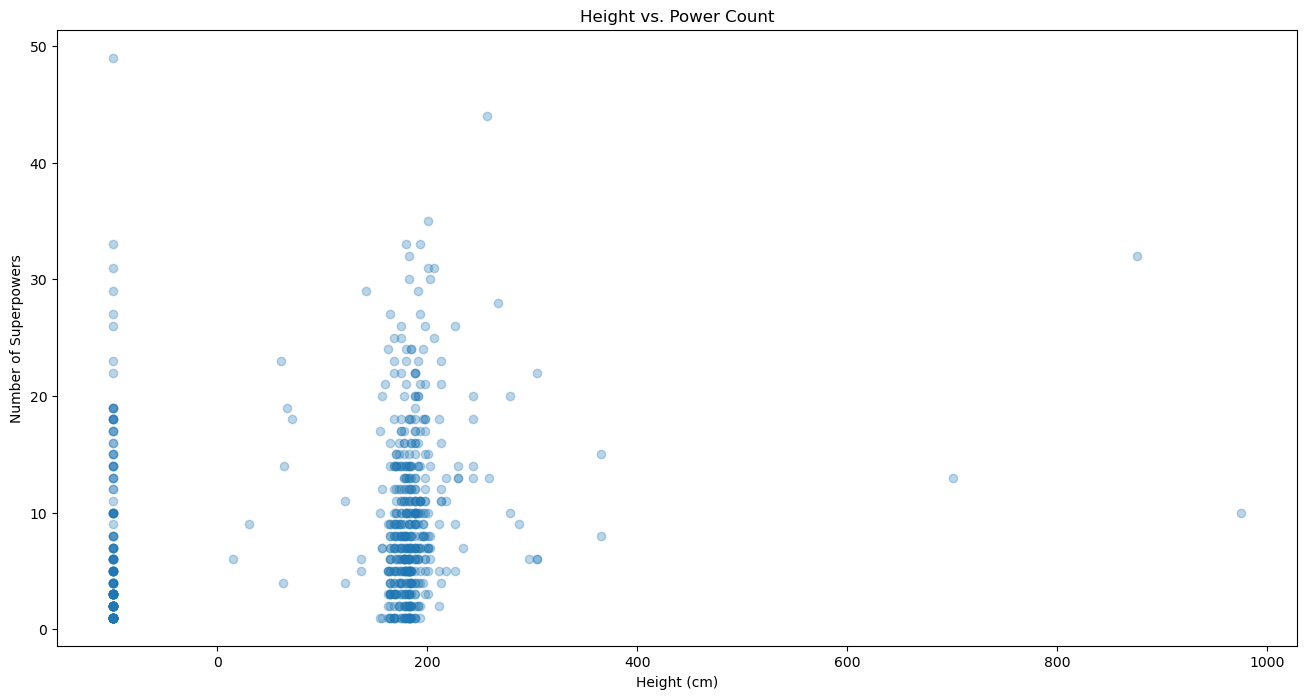

In [54]:
# Run this cell with no changes

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(16, 8))

# Create scatterplot
ax.scatter(
    x=heroes_and_powers_df["Height"], y=heroes_and_powers_df["Power Count"], alpha=0.3
)

# Set labels and Title for plot
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count");

Hmm...what is that stack of values off below zero? What is a "negative" height?

### Identifying and Handling Invalid values

One of the trickier tasks in data cleaning is identifying invalid or impossible values. In these cases, you have to apply your domain knowledge rather than any particular computational technique. For example, if you were looking at data containing dates of past home sales, and one of those dates was 100 years in the future, pandas wouldn't flag that as an issue, but you as a data scientist should be able to identify it.

In this case, we are looking at heights, which are 1-dimensional, positive numbers. In theory we could have a very tiny height close to 0 cm because the hero is microscopic, but it does not make sense that we would have a height below zero.

Let's take a look at a sample of those negative heights:

In [55]:
# Run this cell without changes

# View a sample of the negative heights
heroes_and_powers_df[heroes_and_powers_df["Height"] < 0].sample(5, random_state=1)

,,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
259,259,Firestorm,Male,brown,-,Black,-99.0,DC Comics,-,good,...,False,False,False,False,False,False,False,False,False,22
142,142,Bumbleboy,Male,-,-,-,-99.0,Marvel Comics,-,good,...,False,False,False,False,False,False,False,False,False,2
347,347,Isis,Female,-,-,-,-99.0,DC Comics,-,good,...,False,False,False,False,False,False,False,False,False,10
675,675,Tracy Strauss,Female,-,-,-,-99.0,NBC - Heroes,-,good,...,False,False,False,False,False,False,False,False,False,2
125,125,Blue Beetle III,Male,brown,Human,Black,-99.0,DC Comics,-,good,...,False,False,True,False,False,False,False,False,False,12


It looks like not only are those heights negative, those weights are negative also, and all of them are set to exactly -99.0.

It seems like this data source probably filled in -99.0 as the height or weight whenever it was unknown, instead of just leaving it as NaN.

### Step 9

Depending on the purpose of the analysis, maybe this would be a useful piece of information, but for our current question, let's go ahead and drop the records where the height is -99.0. We'll make a new temporary DataFrame to make sure we don't accidentally delete anything that will be needed in a future question.

In [58]:
# CodeGrade step9
# Replace None with appropriate code

heroes_and_powers_df['Height'] = pd.to_numeric(heroes_and_powers_df['Height'], errors='coerce')
heroes_and_powers_df['Weight'] = pd.to_numeric(heroes_and_powers_df['Weight'], errors='coerce')

# Create a copy of heroes_and_power_df that has no height below 0
question_2_df = heroes_and_powers_df[(heroes_and_powers_df['Height'] >= 0) & (heroes_and_powers_df['Weight'] >= 0)]

# Check new DataFrame copy
question_2_df.head()

,,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,...,False,False,False,False,False,False,False,False,False,7
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,...,False,False,False,False,False,False,False,False,False,16
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,...,False,False,False,False,False,False,False,False,False,1
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,...,False,False,False,False,False,False,False,False,False,8
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,...,False,False,False,False,False,False,False,False,False,11


### Answering the Question, Again

Now we can redo that plot without those negative heights:

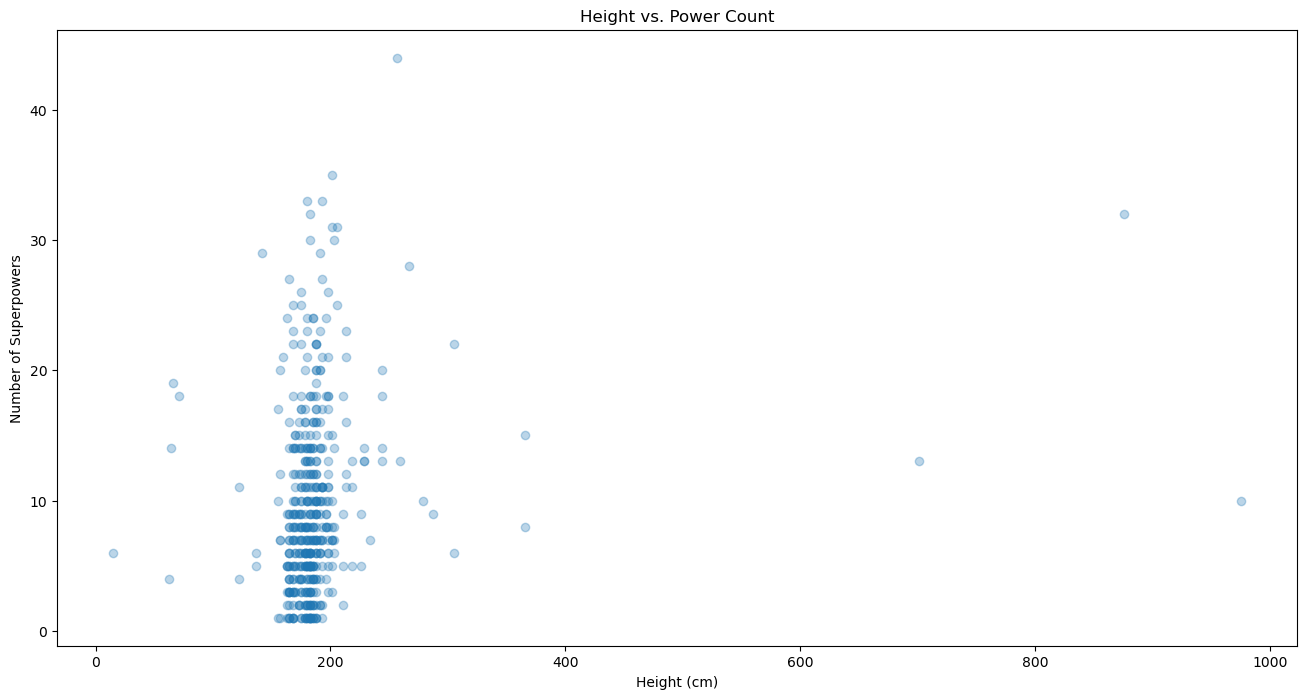

In [59]:
# Run this cell with no changes

# create figure and axis objects
fig, ax = plt.subplots(figsize=(16, 8))

# create scatterplot
ax.scatter(x=question_2_df["Height"], y=question_2_df["Power Count"], alpha=0.3)

# Set labels and Title for plot
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count");

Ok, that makes more sense. It looks like there is not much of a relationship between height and number of superpowers.

Now we can go on to answering the second half of question 2: *And does this differ based on gender?*

To indicate multiple categories within a scatter plot, we can use color to add a third dimension:

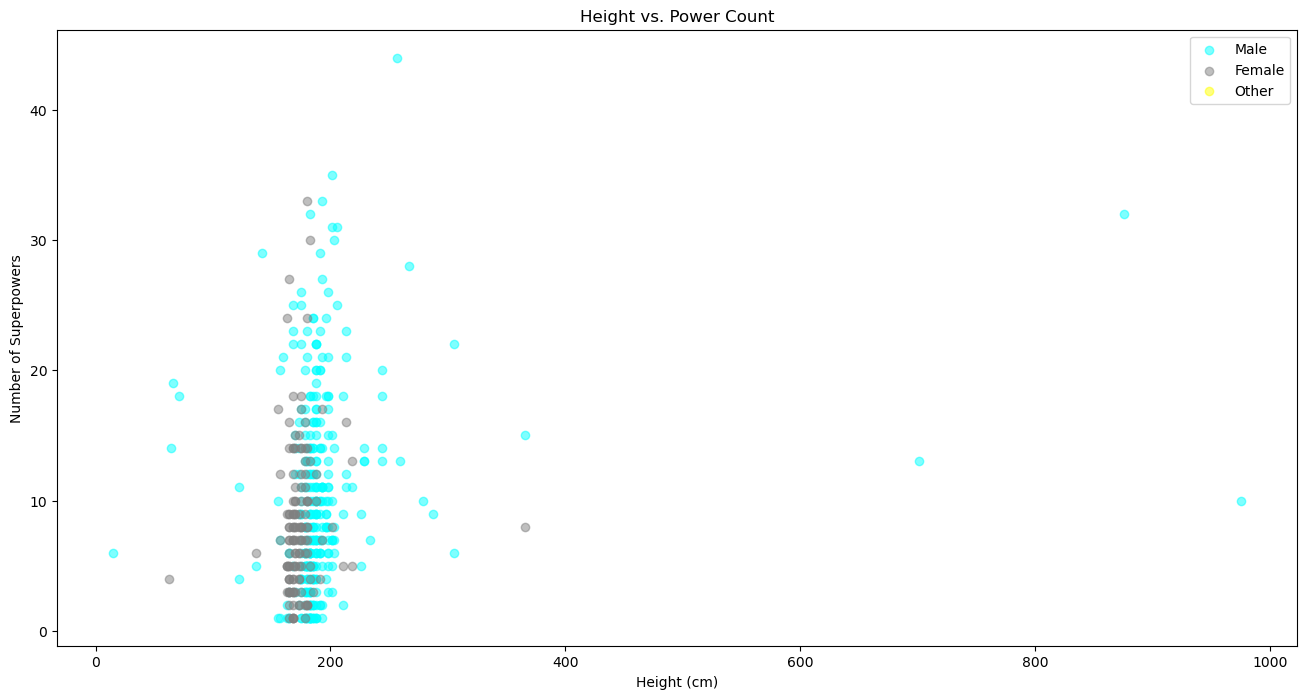

In [60]:
# Run this cell with no changes
fig, ax = plt.subplots(figsize=(16, 8))

# Select subsets
question_2_male = question_2_df[question_2_df["Gender"] == "Male"]
question_2_female = question_2_df[question_2_df["Gender"] == "Female"]
question_2_other = question_2_df[
    (question_2_df["Gender"] != "Male") & (question_2_df["Gender"] != "Female")
]

# Plot data with different colors
ax.scatter(
    x=question_2_male["Height"],
    y=question_2_male["Power Count"],
    alpha=0.5,
    color="cyan",
    label="Male",
)
ax.scatter(
    x=question_2_female["Height"],
    y=question_2_female["Power Count"],
    alpha=0.5,
    color="gray",
    label="Female",
)
ax.scatter(
    x=question_2_other["Height"],
    y=question_2_other["Power Count"],
    alpha=0.5,
    color="yellow",
    label="Other",
)

# Customize appearance
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Number of Superpowers")
ax.set_title("Height vs. Power Count")
ax.legend();

It appears that there is still no clear relationship between count of powers and height, regardless of gender. We do however note that "Male" is the most common gender, and that male superheroes tend to be taller, on average.

## Section 4

### Perform Data Aggregation Required to Answer Third Question

Recall that the third question is: *What are the 5 most common superpowers in Marvel Comics vs. DC Comics?*

We'll need to keep using `heroes_and_powers_df` since we require information from both `heroes_df and powers_df`.

### Step 10

Your resulting `question_3_df` should contain aggregated data, with columns `Superpower Name`, `Marvel Comics` (containing the count of occurrences in Marvel Comics), and `DC Comics` (containing the count of occurrences in DC Comics). Each row should represent a superpower.

In other words, `question_3_df` should look like this:

![view of correct dataframe](question_3.png)

Don't worry if the rows or columns are in a different order, all that matters is that you have the right rows and columns with all the data.

***Hint***: refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) for .groupby and treat each publisher as a group.

In [61]:
heroes_and_powers_df.columns

Index(['', 'name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment',
       ...
       'Reality Warping', 'Odin Force', 'Symbiote Costume', 'Speed Force',
       'Phoenix Force', 'Molecular Dissipation', 'Vision - Cryo',
       'Omnipresent', 'Omniscient', 'Power Count'],
      dtype='object', length=179)

In [76]:
heroes_and_powers_df.head()

,,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Power Count
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,...,False,False,False,False,False,False,False,False,False,7
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,...,False,False,False,False,False,False,False,False,False,16
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,...,False,False,False,False,False,False,False,False,False,1
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,...,False,False,False,False,False,False,False,False,False,8
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,...,False,False,False,False,False,False,False,False,False,11


In [110]:
# Step 1: Copy and filter columns
df = heroes_and_powers_df.copy()
power_columns = df.columns[11:-1]  # adjust as needed
relevant_columns = ['Publisher'] + list(power_columns)
df = df[relevant_columns]

# Step 2: Filter to only Marvel and DC heroes
df = df[df['Publisher'].isin(['Marvel Comics', 'DC Comics'])]

# Step 3: Group by Publisher and count how many heroes have each power (True = 1)
publisher_power_counts = df.groupby('Publisher')[power_columns].sum()

# Step 4: Reshape the result into long format for readability
result_long = publisher_power_counts.reset_index().melt(
    id_vars='Publisher',
    var_name='Power',
    value_name='Hero Count'
)

# Step 5: Optional — sort values
result_long = result_long.sort_values(by=['Publisher', 'Hero Count'], ascending=[True, False])

# View result
result_long  # First few rows


,Publisher,Power,Hero Count
34,DC Comics,Super Strength,76
50,DC Comics,Stamina,67
60,DC Comics,Super Speed,61
16,DC Comics,Flight,60
0,DC Comics,Agility,58
...,...,...,...
323,Marvel Comics,Speed Force,0
327,Marvel Comics,Molecular Dissipation,0
329,Marvel Comics,Vision - Cryo,0
331,Marvel Comics,Omnipresent,0


### Step 11

Now you would need to group by the Publisher column.

Note that grouping requires an associated aggregation, similar to `COUNT` or `SUM` after `GROUP BY` in SQL.

In [111]:
# CodeGrade step11
# Replace None with appropriate code

# Calculate the aggregate sum of powers by Publisher (True values are summed as 1, False as 0 by python)
question_3_grouped = df.groupby('Publisher')[power_columns].sum()

# Check dataframe
question_3_grouped

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Publisher,,,,,,,,,,,,,,,,,,,,,
DC Comics,58,35,8,3,11,57,36,19,60,3,...,0,0,0,0,1,0,0,1,0,0
Marvel Comics,116,90,0,10,22,136,43,33,89,17,...,13,5,2,7,0,1,0,0,0,0


### Step 12

Need to tranpose the result again to get each power as a single row.

In [113]:
# CodeGrade step12
# Replace None with appropriate code

# Step 1: Group by Publisher and count powers
publisher_power_counts = df.groupby('Publisher')[power_columns].sum()

# Step 2: Transpose so each power is a row
transposed = publisher_power_counts.T

# Step 3: Optional — reset index to turn power names into a column
transposed = transposed.reset_index().rename(columns={'index': 'Power'})

# View result
transposed.head()

Publisher,Power,DC Comics,Marvel Comics
0,Agility,58,116
1,Accelerated Healing,35,90
2,Lantern Power Ring,8,0
3,Dimensional Awareness,3,10
4,Cold Resistance,11,22


### Step 13

The last step to match the desired final result of the DataFrame is to change the index name from `Publisher` to `Superpower Name`.

In [117]:
# CodeGrade step13
# Replace None with appropriate code

# Step 1: Group by Publisher and count True values per power
publisher_power_counts = df.groupby('Publisher')[power_columns].sum()

# Step 2: Transpose so powers become rows
transposed = publisher_power_counts.T

# Step 3: Rename the index
transposed.index.name = 'Superpower Name'
question_3_grouped = transposed

### Answering the Question

The code below uses the DataFrame you created to find and plot the most common superpowers in Marvel Comics and DC Comics.

In [118]:
# Run this cell with no changes

# Drop DC Comics from DataFrame
marvel_most_common = question_3_grouped.drop("DC Comics", axis=1)
# sort most commen values from greatest to least
marvel_most_common = marvel_most_common.sort_values(
    by="Marvel Comics", ascending=False
)[:5]

# check values
marvel_most_common

Publisher,Marvel Comics
Superpower Name,
Super Strength,177
Stamina,141
Durability,136
Super Speed,121
Agility,116


In [119]:
# Run this cell with no changes

# drop Marvel Comics from DataFrame
dc_most_common = question_3_grouped.drop("Marvel Comics", axis=1)
# sort most commen values from greatest to least
dc_most_common = dc_most_common.sort_values(by="DC Comics", ascending=False)[:5]

# check values
dc_most_common

Publisher,DC Comics
Superpower Name,
Super Strength,76
Stamina,67
Super Speed,61
Flight,60
Agility,58


In [121]:
marvel_most_common

Publisher,Marvel Comics
Superpower Name,
Super Strength,177
Stamina,141
Durability,136
Super Speed,121
Agility,116


C:\Users\aleja\AppData\Local\Temp\ipykernel_4316\423242384.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(marvel_most_common.index, rotation=45, ha='right')
C:\Users\aleja\AppData\Local\Temp\ipykernel_4316\423242384.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(dc_most_common.index, rotation=45, ha='right')


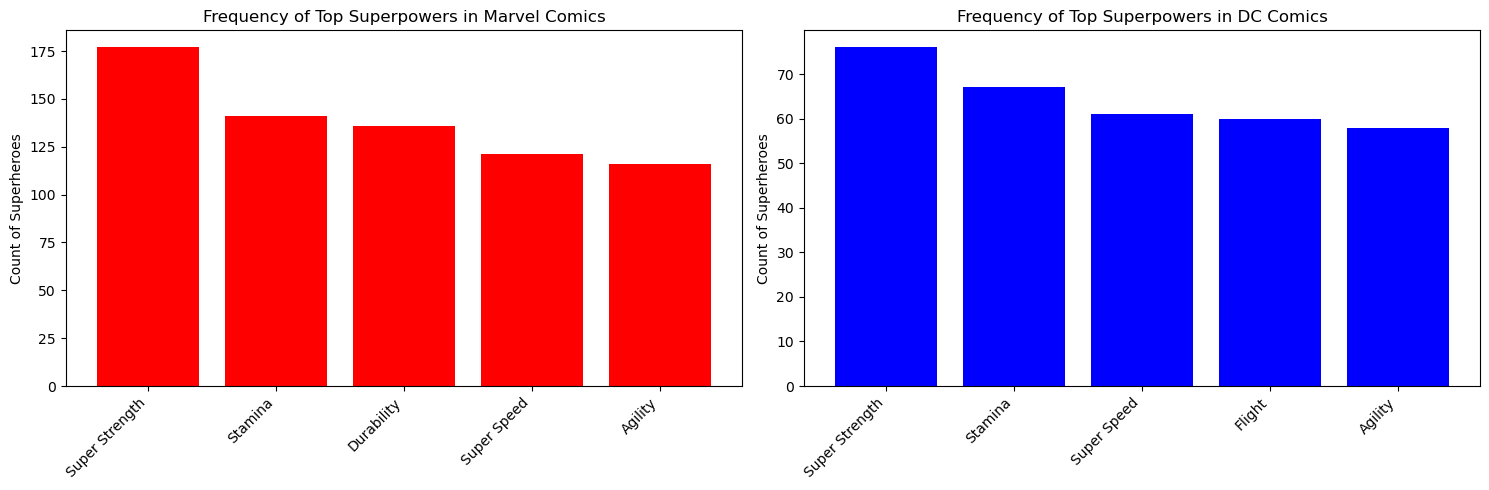

In [123]:
# Run this cell with no changes

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

# Marvel plot
ax1.bar(
    x=marvel_most_common.index, 
    height=marvel_most_common["Marvel Comics"],
    color='red'
)
ax1.set_xticklabels(marvel_most_common.index, rotation=45, ha='right')
ax1.set_ylabel("Count of Superheroes")
ax1.set_title("Frequency of Top Superpowers in Marvel Comics")

# DC plot
ax2.bar(
    x=dc_most_common.index, 
    height=dc_most_common["DC Comics"],
    color='blue'
)
ax2.set_xticklabels(dc_most_common.index, rotation=45, ha='right')
ax2.set_ylabel("Count of Superheroes")
ax2.set_title("Frequency of Top Superpowers in DC Comics")

plt.tight_layout()
plt.show()


It looks like super strength is the most popular power in both Marvel Comics and DC Comics. Overall, the top 5 powers are fairly similar — 4 out of 5 overlap, although Marvel contains agility whereas DC contains flight.

## Section 5

### Formulate and Answer Your Own Question

For the remainder of this lab (ungraded), you'll be focusing on coming up with and answering your own question, just like we did above. Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer. In case you're unsure of what questions to ask, some sample questions have been provided below.
Pick one of the following questions to investigate and answer, or come up with one of your own!

- Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight)?
- What is the distribution of skin colors amongst alien heroes?
- How are eye color and hair color related in this dataset?

Explain your question below:
    
Some sample cells have been provided to give you room to work. Feel free to create more cells as needed.

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

(There is no solution for this part, and feel free to move on to the next lesson if you have already spent more than 60 minutes.)

### Summary

In this lab, you demonstrated your mastery of using pandas to clean and aggregate data in order to answer several business questions. This included identifying and handling missing values, text requiring preprocessing, and invalid values. You also performed aggregation and reshaping tasks such as transposing, joining, and grouping data. Great job, there was a lot here!